<a href="https://colab.research.google.com/github/Cristalreal/Cristalreal/blob/main/DL_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import random
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

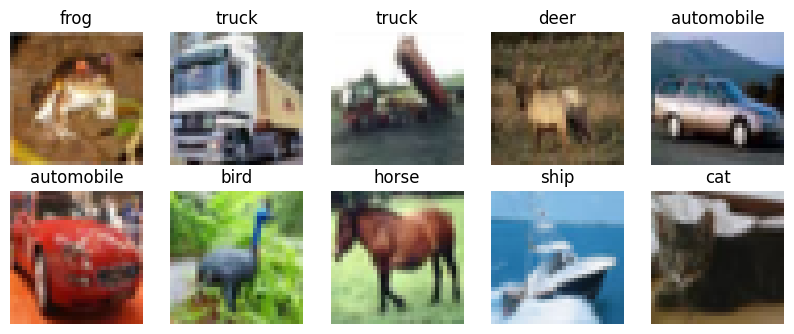

In [ ]:
n = 50000
X_train = X_train[:n]
y_train = y_train[:n]

X_train = X_train / 255.0
X_test = X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap = plt.cm.binary)
  plt.axis('off')
  plt.title(class_names[y_train[i,0]])

plt.show()


In [ ]:
dim = X_train.shape
dim

(50000, 32, 32, 3)

-- Formulate/ Outline the problem
-- Identify inputs and outputs
-- Prepare data
Choose a loss function and optimizer
Train the model
Perform a Prediction/Classification
Measure Performance
Tune Hyperparameters
Share/Deploy Model

In [ ]:
def create_CNN_model():

  # Conv part
  inputs = keras.Input(shape=X_train.shape[1:])
  conv1 = keras.layers.Conv2D(50, (3,3), activation = 'relu')(inputs)
  pool1 = keras.layers.MaxPooling2D((2,2))(conv1)
  conv2 = keras.layers.Conv2D(50, (3,3), activation = 'relu')(pool1)
  pool2 = keras.layers.MaxPooling2D((2,2))(conv2)

  # Decoder - Class probability extractor
  flattened = keras.layers.Flatten()(pool2)
  dense1 = keras.layers.Dense(50, activation = 'relu')(flattened)
  outputs = keras.layers.Dense(10, activation = 'softmax')(dense1)

  model = keras.Model(inputs= inputs, outputs = outputs, name = 'ConvNN')

  return model

model = create_CNN_model()
model.summary()

Model: "ConvNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1800)              0    

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5015 - accuracy: 0.4607
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1554 - accuracy: 0.5953
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0218 - accuracy: 0.6454
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9364 - accuracy: 0.6733
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8758 - accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8264 - accuracy: 0.7132
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7834 - accuracy: 0.7288
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7447 - accuracy: 0.7423
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7127 - accuracy: 0.7522
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.67

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores)

313/313 [==============================] - 1s 3ms/step - loss: 0.9160 - accuracy: 0.6946
[0.915974497795105, 0.694599986076355]


## HP tuning

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.2,
                                                  shuffle = True)

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6465 - accuracy: 0.7726 - val_loss: 0.6899 - val_accuracy: 0.7533
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6129 - accuracy: 0.7849 - val_loss: 0.6688 - val_accuracy: 0.7642
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5862 - accuracy: 0.7927 - val_loss: 0.7371 - val_accuracy: 0.7378
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5579 - accuracy: 0.8039 - val_loss: 0.7064 - val_accuracy: 0.7600
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5297 - accuracy: 0.8142 - val_loss: 0.7778 - val_accuracy: 0.7381
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5075 - accuracy: 0.8195 - val_loss: 0.7743 - val_accuracy: 0.7424
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4849 - accuracy: 0.8303 - val_loss: 0.7918 - val_accuracy:

In [ ]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data = history_df[['accuracy', 'val_accuracy']])

In [ ]:
sns.lineplot(data = history_df[['loss','val_loss']])

#Dropout layer to mitigate overfitting in CNNs

In [ ]:
def create_dropout_CNN_model():
  inputs = keras.Input(shape = X_train.shape[1:])
  conv1 = keras.layers.Conv2D(50, (3,3), activation = 'relu')(inputs)
  pool1 = keras.layers.MaxPooling2D((2,2))(conv1)
  conv2 = keras.layers.Conv2D(50, (3,3), activation = 'relu')(pool1)
  pool2 = keras.layers.MaxPooling2D((2,2))(conv2)
  conv3 = keras.layers.Conv2D(50, (3,3), activation = 'relu')(pool2)
  pool3 = keras.layers.MaxPooling2D((2,2))(conv3)

  # This is new, this is the dropout layer
  drop1 = keras.layers.Dropout(0.3)(pool3)
  flattened = keras.layers.Flatten()(drop1)
  dense1 = keras.layers.Dense(50, activation = 'relu')(flattened)
  outputs = keras.layers.Dense(10, activation = 'softmax')(dense1)

  model = keras.Model(inputs = inputs, outputs = outputs, name = 'Dropout_CNN')
  return model

model = create_dropout_CNN_model()
model.summary()
model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])



In [ ]:
from keras.callbacks import EarlyStopping

ES = EarlyStopping(monitor = 'val_loss', patience = 10)

history_dropout = model.fit(X_train, y_train,
                            validation_data = (X_val, y_val),
                            epochs = 100, verbose = 0,
                            callbacks = [ES])

scores = model.evaluate(X_test, y_test)
print(scores)

In [ ]:
history_df = pd.DataFrame.from_dict(history_dropout.history)
history_df['epoch'] = range(1, len(history_df) + 1)
history_df = history_df.set_index('epoch')
sns.lineplot(data = history_df[['accuracy', 'val_accuracy']])

In [ ]:
sns.lineplot(data = history_df[['loss', 'val_loss']])